# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data Collection and Data Exploration

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


# Exploring Data


In [5]:
df.shape

(195, 24)

In [6]:
df.info

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Data Visualization


### Distribution of "status" column

In [9]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

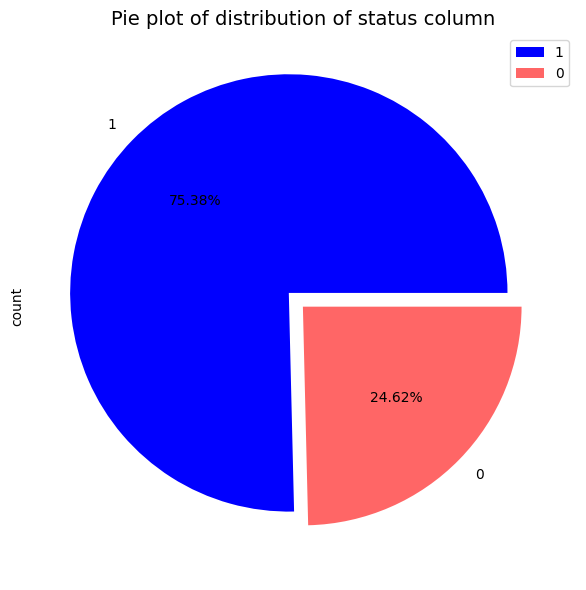

In [10]:
explode=(0.09,0)

df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(12,6),explode=explode,colors=['#0000FF','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

### Grouping the data based on "status" column

In [11]:
df=df.drop(["name"],axis=1)
df.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Feature Selection

### Correlation Heatmap

<Axes: >

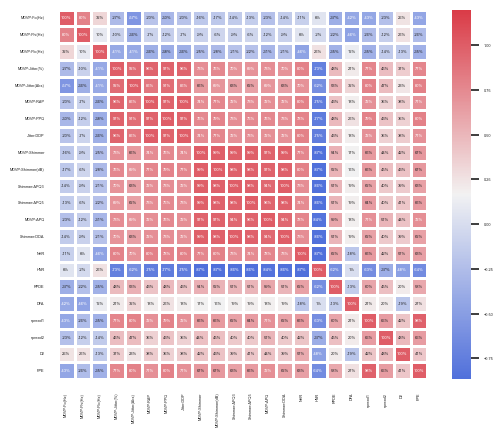

In [12]:
sns.set(font_scale=0.25)
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df.drop(["status"], axis=1).corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(df.drop(["status"], axis=1), 0.85)
corr_features

{'HNR',
 'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

### Relation among Categorical and Numerical features

In [15]:
df_anova = df
grps = pd.unique(df_anova.status.values)

coldrop = []

for i in range(len(df_anova.columns)-1):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.status == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and status".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and status \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and status \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

P_Value of MDVP:Fo(Hz) and status 3.121919402836281e-08
There is relation between MDVP:Fo(Hz) and status 

P_Value of MDVP:Fhi(Hz) and status 0.020275669142798075
There is relation between MDVP:Fhi(Hz) and status 

P_Value of MDVP:Flo(Hz) and status 4.1970041821534755e-08
There is relation between MDVP:Flo(Hz) and status 

P_Value of MDVP:Jitter(%) and status 8.209989250843791e-05
There is relation between MDVP:Jitter(%) and status 

P_Value of MDVP:Jitter(Abs) and status 1.2822523240682343e-06
There is relation between MDVP:Jitter(Abs) and status 

P_Value of MDVP:RAP and status 0.00016433934101952843
There is relation between MDVP:RAP and status 

P_Value of MDVP:PPQ and status 4.257766523261801e-05
There is relation between MDVP:PPQ and status 

P_Value of Jitter:DDP and status 0.00016454664474031017
There is relation between Jitter:DDP and status 

P_Value of MDVP:Shimmer and status 1.264702289675246e-07
There is relation between MDVP:Shimmer and status 

P_Value of MDVP:Shimmer(dB

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### Checking Constant features


In [16]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [17]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

var_thres.get_support()

print(df.columns[var_thres.get_support()])


constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
[]
0


### Dropping features

In [18]:
corr_features = list(corr_features)

list_drop = corr_features + coldrop
list_drop

['Shimmer:DDA',
 'MDVP:RAP',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'HNR',
 'MDVP:Jitter(Abs)',
 'PPE',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'MDVP:PPQ',
 'MDVP:APQ']

In [19]:
df.drop(list_drop, axis=1, inplace=True)
display(df.columns)
display(df.shape)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'NHR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2'],
      dtype='object')

(195, 12)

# Splitting of the data and Standardization


### Seperating target column


In [20]:
X = df.drop(["status"], axis=1)
y = df["status"]

In [21]:
X.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,0.417356,0.823484,-3.747787,0.234513,2.332180


In [22]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### Data Standardization


In [23]:
scaler=MinMaxScaler(feature_range=(0,1))
feature=scaler.fit_transform(X)
feature

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.56987521, 0.58576513,
        0.39066128],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.70327699, 0.74133704,
        0.47314522],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.6367447 , 0.68637091,
        0.40881938],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.21294468, 0.34257652,
        0.55896743],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.2206504 , 0.45288473,
        0.31822198],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.40516128, 0.41509481,
        0.50367281]])

### Splitting data into train and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=50)
X_train

array([[0.15081038, 0.04541474, 0.06647322, ..., 0.50244452, 0.5694376 ,
        0.32378859],
       [0.16848497, 0.05668881, 0.25865027, ..., 0.60689794, 0.63876151,
        0.2661651 ],
       [0.33090958, 0.19589087, 0.08728569, ..., 0.42862577, 0.27390994,
        0.15244223],
       ...,
       [0.60951145, 0.21791849, 0.08532822, ..., 0.38327663, 0.61322231,
        0.52737171],
       [0.16194141, 0.06039377, 0.25527076, ..., 0.37943316, 0.51054998,
        0.45481274],
       [0.16332697, 0.05489656, 0.25040589, ..., 0.35221652, 0.23182709,
        0.25865932]])

In [25]:
X_test

array([[7.35102345e-02, 1.60731600e-02, 1.73592640e-01, 1.39135959e-01,
        1.34471426e-01, 3.73046440e-02, 6.95411136e-01, 8.51031449e-01,
        5.32041404e-01, 3.16677134e-01, 4.47098762e-01],
       [4.38505694e-01, 2.01467691e-01, 6.50742110e-02, 1.82337992e-01,
        6.43600511e-02, 5.45246204e-02, 3.29848967e-01, 6.30251866e-01,
        4.35284299e-01, 4.83131068e-01, 5.64485548e-01],
       [3.47885569e-01, 1.23863764e-01, 1.07487881e-02, 1.88691233e-01,
        4.08435275e-01, 7.53095458e-02, 5.38607638e-01, 6.09670685e-01,
        3.08055953e-01, 2.58165454e-01, 3.17539998e-01],
       [3.81406748e-01, 1.29812099e-01, 1.76171888e-03, 2.13468869e-01,
        2.60726675e-01, 1.21144603e-01, 9.41607304e-01, 5.17139033e-01,
        6.99615780e-01, 5.76945155e-01, 5.85631808e-01],
       [1.19192884e-01, 6.63645549e-02, 2.15309683e-01, 1.88373571e-01,
        1.61128355e-01, 3.09068339e-02, 6.52009772e-01, 9.75076293e-01,
        5.99428525e-01, 4.48616561e-01, 2.50731805e-

In [26]:
y_train
# print(y_train[1])

160    1
57     1
125    1
126    1
75     1
      ..
132    1
33     0
109    1
139    1
176    0
Name: status, Length: 136, dtype: int64

In [27]:
y_test

82     1
24     1
69     1
20     1
54     1
181    1
192    0
8      1
177    1
39     1
12     1
83     1
156    1
23     1
184    0
25     1
122    1
159    1
61     0
172    0
120    1
171    0
149    1
165    0
103    1
186    0
153    1
34     0
118    1
89     1
140    1
170    0
77     1
137    1
100    1
107    1
194    0
63     0
112    1
161    1
38     1
76     1
40     1
185    0
97     1
80     1
13     1
116    1
1      1
182    1
117    1
162    1
135    1
48     0
173    0
16     1
98     1
81     1
138    1
Name: status, dtype: int64

In [28]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (136, 11)
Shape of y_train: (136,)
Shape of X_test: (59, 11)
Shape of y_test: (59,)


In [29]:
print(len(y_train[y_train==1]), len(y_train[y_train==0]))


102 34


# Balancing Training Data - Over Sampling


In [30]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

102 102
204


# Model Building - SVM

In [31]:
model = SVC()
model.fit(X_train,y_train)
y2_pred = model.predict(X_test)
print(accuracy_score(y_test, y2_pred)*100)

94.91525423728814


In [32]:
from sklearn.model_selection import GridSearchCV 
def grid_search(X,Y):
# defining parameter range 
    param_grid = {'C': [0.1,1,25,50,75,10, 100],  
                'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8,0.5,0.75,0.3], 
                'kernel': ['rbf', 'poly', 'sigmoid']}  
    
    grid = GridSearchCV(model, param_grid, refit = True, verbose = 3) 
    
    # fitting the model for grid search 
    grid.fit(X, Y) 
    # y2_pred = grid.predict(X_test)
    # print(accuracy_score(y_test, y2_pred)*100)

    return grid.best_params_

In [33]:
grid_search(X_train,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.854 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.829 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.829 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.732 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.775 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.561 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmo

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [34]:
param_grid = {'C': [100],  
                'gamma': [0.8], 
                'kernel': ['rbf']}  
    
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3) 
    
    # fitting the model for grid search 
grid.fit(X_train, y_train) 
y2_pred = grid.predict(X_test)
print(accuracy_score(y_test, y2_pred)*100)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=100, gamma=0.8, kernel=rbf;, score=0.902 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.8, kernel=rbf;, score=0.976 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.8, kernel=rbf;, score=0.951 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.8, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.8, kernel=rbf;, score=0.950 total time=   0.0s
94.91525423728814


In [35]:
from sklearn.ensemble import BaggingClassifier

svm_model = SVC(kernel='rbf', C=100, gamma=0.8)  # Example parameters
bagging_clf = BaggingClassifier(svm_model, n_estimators=200,random_state=30)  # Set number of estimators
bagging_clf.fit(X_train,y_train)
y2_pred = bagging_clf.predict(X_test)
print(accuracy_score(y_test, y2_pred)*100)


93.22033898305084
